In [1]:
import os
import importlib

import numpy as np
import pandas as pd

import funcs
importlib.reload(funcs)

<module 'funcs' from 'Z:\\funcs.py'>

## ssm data

In [2]:
dir = r"data\2014\f16\ssm"
fn = "dmsp-f16_ssm_magnetometer_20140101_v1.0.4.cdf"
fp = os.path.join(dir,fn)
ssm_data = funcs.process_ssm_data(fp)
# funcs.ssm(fp)  # 原始数据

## ssies3 data

In [3]:
dir = r"data\2014\f16\ssies3"
fn = "dmsp-f16_ssies-3_thermal-plasma_201401011654_v01.cdf"
fp = os.path.join(dir,fn)
ssies3_data = funcs.process_ssies3_data(fp)
# funcs.ssies3(fp) # 原始数据

## ssm数据切片，保证ssm和ssies3数据的所有的时间点一致

In [4]:
ssm_data_clip = funcs.clip_ssm_by_ssies3(ssies3_data, ssm_data)

# temperature

In [5]:
# T = (ssies3_data['temp'] + ssies3_data['te'])/2

# magnetic field

## observed

In [6]:
# B = np.sqrt(ssm_data_clip['B_SC_OBS_ORIG_x']**2 + ssm_data_clip['B_SC_OBS_ORIG_y']**2 + ssm_data_clip['B_SC_OBS_ORIG_z']**2)

# $\beta$

In [7]:
# beta = funcs.calculate_beta(ssies3_data['ductdens'], T, B)

## draw

### plt

In [8]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# 
# # 生成时间序列数据
# dates = ssies3_data.index
# values = beta
# 
# # 创建绘图
# plt.figure(figsize=(10, 6))
# plt.plot(dates, values)
# 
# # 设置标题和标签
# plt.title('Time Series Data')
# plt.xlabel('Date')
# plt.ylabel('Values')
# 
# # 自动格式化日期
# plt.gcf().autofmt_xdate()
# 
# # 指定横线的值
# specified_value = 3.428622509055789e-05  # 例如指定值为10
# 
# # 添加横线
# plt.axhline(y=specified_value, color='red', linestyle='--', linewidth=2)
# 
# # 设置垂直偏移量
# offset = 5e-6  # 垂直偏移量，可以调节这个值来调整标注的位置
# 
# # 在图中标注横线的值
# plt.text(dates.max(), specified_value + offset, f'me/mi', 
#          color='red', va='center', ha='left')
# 
# # 显示图表
# plt.show()


### plotly

In [9]:
# import plotly.express as px
# import pandas as pd
# import numpy as np
# 
# # 生成时间序列数据
# dates = ssies3_data.index
# values = beta
# 
# # 创建 DataFrame
# df = pd.DataFrame({'Date': dates, 'Values': values})
# 
# # 指定的横线值
# specified_value = 3.428622509055789e-05  # 例如20
# 
# # 使用 plotly 绘制交互式时间序列图
# fig = px.line(df, x='Date', y='Values', title='Interactive Time Series Data')
# 
# # 添加横线 (y=指定值)
# fig.add_shape(
#     type="line",
#     x0=df['Date'].min(),  # 起始 x 位置
#     y0=specified_value,   # 起始 y 位置
#     x1=df['Date'].max(),  # 结束 x 位置
#     y1=specified_value,   # 结束 y 位置
#     line=dict(color="Red", width=2, dash="dash"),  # 可以设置线条样式
# )
# 
# # 添加注释，标注横线的值
# fig.add_annotation(
#     x=df['Date'].max(),  # 标注位置的 x 坐标
#     y=specified_value,   # 标注位置的 y 坐标
#     text=f"Specified Value: {specified_value}",  # 显示文本
#     showarrow=False,
#     yshift=10  # 调整标注的垂直偏移
# )
# 
# # 显示图表
# fig.show()


# fraction of ion

In [10]:
# vline_positions = pd.to_datetime(['2014-01-01 08:45:00', '2014-01-01 09:15:00', '2014-01-01 09:45:00'])
# funcs.draw_frac_ions(ssies3_data.index, ssies3_data['fraco'], ssies3_data['frach'], ssies3_data['frache'], vline_positions)

## 直方图

In [11]:
# import plotly.graph_objects as go
# import numpy as np
# 
# # 示例数据
# data = ssies3_data['fraco']
# 
# # 使用Plotly绘制直方图
# fig = go.Figure(data=[go.Histogram(x=data, nbinsx=10, histnorm='probability', marker=dict(color='blue', line=dict(color='black', width=1)))])
# 
# # 设置布局
# fig.update_layout(
#     xaxis_title='Value',
#     yaxis_title='Relative Frequency',
#     bargap=0.05,  # 设置柱子之间的间隔
# )
# 
# # 显示交互式图形
# fig.show()

# n

数密度不能过小

# b

In [12]:
Bx = ssm_data_clip['B_SC_OBS_ORIG_y']
By = -ssm_data_clip['B_SC_OBS_ORIG_z']
Bz = -ssm_data_clip['B_SC_OBS_ORIG_x']

In [13]:
B_E = ssm_data_clip['SC_ALONG_GEO_x'] * Bx + ssm_data_clip['SC_ACROSS_GEO_x'] * By
B_N = ssm_data_clip['SC_ALONG_GEO_y'] * Bx + ssm_data_clip['SC_ACROSS_GEO_y'] * By
B_U = Bz

## 验证坐标转换是否正确

图象重合即说明正确

In [14]:
# B_E.plot(),ssies3_data['by'].plot()

In [15]:
# B_N.plot(),ssies3_data['bx'].plot()

In [16]:
# B_U.plot(),(-ssies3_data['bz']).plot()

## $B_0$

IGRF同滤波、平均值得到的背景场的比较

In [17]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# # 设置字体为 SimHei，适用于中文
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# from scipy.signal import butter, filtfilt
# 
# # low-pass filter
# t = ssies3_data.index  # 时间向量
# sig = B_E
# 
# fs = 1    # 采样频率，单位 Hz
# 
# # 定义低通滤波器
# def butter_lowpass(cutoff, fs, order=5):
#     nyq = 0.5 * fs  # 奈奎斯特频率
#     normal_cutoff = cutoff / nyq
#     # 得到滤波器参数
#     b, a = butter(order, normal_cutoff, btype='low', analog=False)
#     return b, a
# 
# def lowpass_filter(data, cutoff, fs, order=5):
#     b, a = butter_lowpass(cutoff, fs, order=order)
#     # 应用滤波器
#     y = filtfilt(b, a, data)
#     return y
# 
# 
# # 低通滤波器的参数
# cutoff = 0.3  # 截止频率，单位 Hz
# order = 4     # 滤波器阶数
# 
# # 应用低通滤波器
# filtered_signal = lowpass_filter(sig, cutoff, fs, order)
# 
# # average
# data = pd.DataFrame({
#     'time': ssies3_data.index,
#     'value': B_E  # 示例随机生成的数据
# })
# segment_length = 20
# # 将数据分段，计算每段的平均值
# background_values = []
# for i in range(0, len(data), segment_length):
#     segment = data['value'].iloc[i:i+segment_length]  # 使用iloc按位置进行切片
#     background_values.extend([segment.mean()] * len(segment))
# data['background'] = background_values
# 
# # draw
# plt.figure(figsize=(10, 6))
# plt.plot(t,B_E,label=r'observed')
# plt.plot(t,ssies3_data['by'],label=r'IGRF')
# plt.plot(t,filtered_signal,label=f'low-pass filter (cutoff = {cutoff})')
# plt.plot(t,data['background'],label=f'segment_length = {segment_length}')
# plt.xlabel('UT Time [seconds]')
# plt.ylabel('B [nT]')
# plt.title(r'observed magnetic field and background magnetic field obtained by various methods')
# plt.legend()
# plt.grid()
# plt.show()

In [18]:
## b

In [19]:
# plt.figure(figsize=(10, 6))
# plt.plot(t,B_E-ssies3_data['by'],label='IGRF')
# plt.plot(t,B_E-filtered_signal,label=f'low-pass filter (cutoff = {cutoff})')
# plt.plot(t,B_E-data['background'],label=f'averaged (segment_length = {segment_length})')
# plt.xlabel('UT Time [seconds]')
# plt.ylabel('disturbed magnetic field [nT]')
# plt.title('disturbed magnetic field obtained by various methods')
# plt.legend()
# plt.grid()
# plt.show()

In [20]:
# # 创建一个包含2行2列的子图网格
# fig, axes = plt.subplots(3, figsize=(10, 8))
# 
# # 第一子图
# axes[0].plot(t, B_E-ssies3_data['by'], color='b', label='IGRF')
# axes[0].legend()
# 
# # 第二子图
# axes[1].plot(t, B_E-filtered_signal, color='g', label=f'low-pass filter (cutoff = {cutoff})')
# axes[1].set_ylabel('disturbed magnetic field [nT]')
# axes[1].legend()
# 
# # 第三子图
# axes[2].plot(t, B_E-data['background'], color='tab:orange', label=f'averaged (segment_length = {segment_length})')
# axes[2].set_xlabel('UT Time [seconds]')
# axes[2].legend()
# 
# # 添加全局标题
# fig.suptitle('disturbed magnetic field obtained by various methods', fontsize=16)
# 
# # 调整子图间距
# plt.tight_layout(rect=[0, 0, 1, 0.95])  # 防止子图和全局标题重叠
# 
# # 显示图形
# plt.show()

In [21]:
len(ssies3_data)

6115

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider


# Define the plotting function with adjustable window size
def plot_moving_average(window_size):
    # Apply moving average
    moving_avg = B_E.rolling(window=window_size, min_periods=1).mean()
    
    # Plot original and moving average data
    plt.figure(figsize=(14, 6))
    plt.plot(B_E, label='Original Data', alpha=0.6)
    plt.plot(moving_avg, label=f'Moving Average (Window size: {window_size} seconds)', color='orange')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Time Series Data with Adjustable Moving Average')
    plt.legend()
    plt.show()


# Create an interactive slider for window size
interact(plot_moving_average, window_size=IntSlider(min=1, max=120, step=1, value=60, description='Window Size (s)'))

interactive(children=(IntSlider(value=60, description='Window Size (s)', max=120, min=1), Output()), _dom_clas…

<function __main__.plot_moving_average(window_size)>

In [23]:
import pandas as pd
import numpy as np

# Function to calculate and return the moving average
def get_moving_average(series, window_size):
    # Apply moving average
    moving_avg = series.rolling(window=window_size, min_periods=1).mean()
    return moving_avg

# Example usage with a specified window size (e.g., 60 seconds)
window_size = 60
moving_average_result = get_moving_average(B_E, window_size)

# Display the result
print(moving_average_result)


Epoch
2014-01-01 16:54:30   -1849.161118
2014-01-01 16:54:31   -1848.460240
2014-01-01 16:54:32   -1847.730746
2014-01-01 16:54:33   -1846.769871
2014-01-01 16:54:34   -1846.075286
                          ...     
2014-01-01 18:36:20   -4425.937613
2014-01-01 18:36:21   -4426.092596
2014-01-01 18:36:22   -4426.269024
2014-01-01 18:36:23   -4426.437914
2014-01-01 18:36:24   -4426.600319
Freq: s, Length: 6115, dtype: float64


<Axes: xlabel='Epoch'>

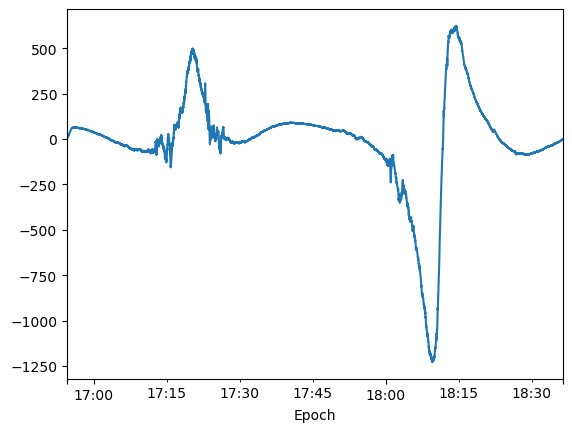

In [24]:
(B_E-moving_average_result).plot()

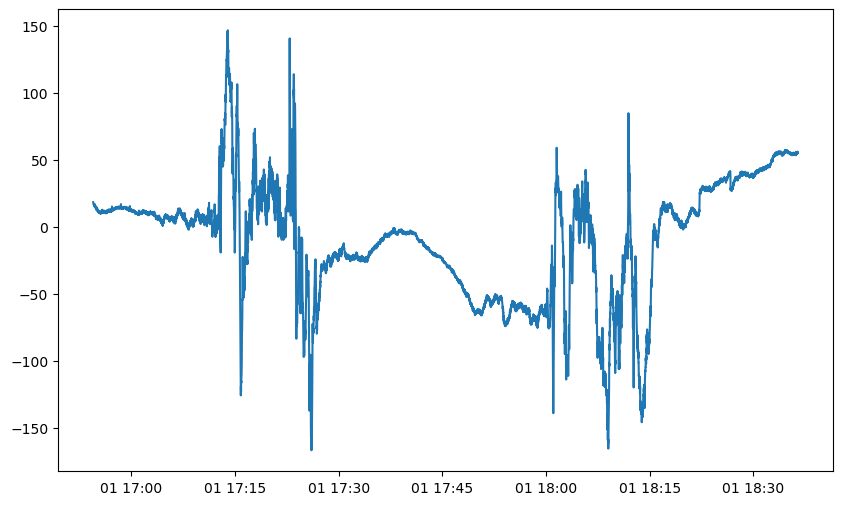

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(ssies3_data.index,B_E-ssies3_data['by'],label='IGRF')

## 频谱图？

In [26]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.fft import fft, fftfreq
# 
# # 生成模拟时序数据
# t = ssies3_data.index  # 时间向量
# # 10 Hz 的信号加上一些噪声
# sig = B_E.values
# 
# # 采样频率（假设每秒采样500次）
# fs = 1
# 
# # Step 1: 对信号进行FFT转换
# N = len(t)  # 数据点个数
# yf = fft(sig)  # 计算fft
# xf = fftfreq(N, 1 / fs)[:N // 2]  # 计算频率分量
# 
# # Step 2: 绘制频谱图
# plt.figure(figsize=(10, 6))
# plt.plot(xf, 2.0 / N * np.abs(yf[:N // 2]))
# plt.title('Signal Frequency Spectrum')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Amplitude')
# plt.grid()
# plt.show()
# 
# # Step 3: 根据频谱选择低通滤波器的截止频率
# # 通过观察频谱图选择合适的 cutoff 频率，例如在频率 15 Hz 处设置截止频率
# cutoff = 15.0  # 根据频谱图手动设置 cutoff frequency


In [27]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.fft import fft, fftfreq
# from scipy.signal import butter, filtfilt
# import ipywidgets as widgets
# from IPython.display import display
# 
# # 假设你已经有 ssies3_data 和 B_E 数据
# # t 是时间向量, sig 是信号
# t = ssies3_data.index
# sig = B_E.values
# 
# # 采样频率
# fs = 1
# 
# # 定义低通滤波器
# def butter_lowpass(cutoff, fs, order=4):
#     nyq = 0.5 * fs  # 奈奎斯特频率
#     normal_cutoff = cutoff / nyq
#     b, a = butter(order, normal_cutoff, btype='low', analog=False)
#     return b, a
# 
# def lowpass_filter(data, cutoff, fs, order=4):
#     b, a = butter_lowpass(cutoff, fs, order=order)
#     y = filtfilt(b, a, data)
#     return y
# 
# # 定义交互式绘图函数，显示原始信号和滤波后信号的频谱
# def plot_filtered_spectrum(cutoff):
#     filtered_signal = lowpass_filter(sig, cutoff, fs, order=4)
#     
#     # Step 1: 对原始信号和滤波信号进行FFT转换
#     N = len(t)  # 数据点个数
#     yf_orig = fft(sig)  # 原始信号的fft
#     yf_filtered = fft(filtered_signal)  # 滤波后信号的fft
#     xf = fftfreq(N, 1 / fs)[:N // 2]  # 计算频率分量
# 
#     # Step 2: 绘制频谱图
#     plt.figure(figsize=(10, 6))
#     plt.plot(xf, 2.0 / N * np.abs(yf_orig[:N // 2]), label='Original Signal Spectrum')
#     plt.plot(xf, 2.0 / N * np.abs(yf_filtered[:N // 2]), label=f'Filtered Signal Spectrum (cutoff={cutoff} Hz)')
#     plt.title('Signal Frequency Spectrum with Lowpass Filter')
#     plt.xlabel('Frequency (Hz)')
#     plt.ylabel('Amplitude')
#     plt.grid()
#     plt.legend()
#     plt.show()
# 
# # 创建交互式滑块，允许选择cutoff值
# cutoff_slider = widgets.FloatSlider(value=0.1, min=0.0001, max=fs/2, step=0.01, description='Cutoff Frequency', continuous_update=False)
# widgets.interact(plot_filtered_spectrum, cutoff=cutoff_slider)


# $v_A$

In [28]:
_ = {'E':B_E-ssies3_data['by'],'N':B_N-ssies3_data['bx'],'U':B_U+ssies3_data['bz']}
b = pd.DataFrame(_)

In [29]:
_ = {'1':B_E,'2':B_N,'3':B_U}
v_A = funcs.calculate_vA(pd.DataFrame(_),ssies3_data['ductdens'],ssies3_data['fraco'],ssies3_data['frach'],ssies3_data['frache'])

In [32]:
v = funcs.ssies_sc_to_ENU(ssies3_data['vx'],ssies3_data['vy'],ssies3_data['vz'],ssm_data_clip)

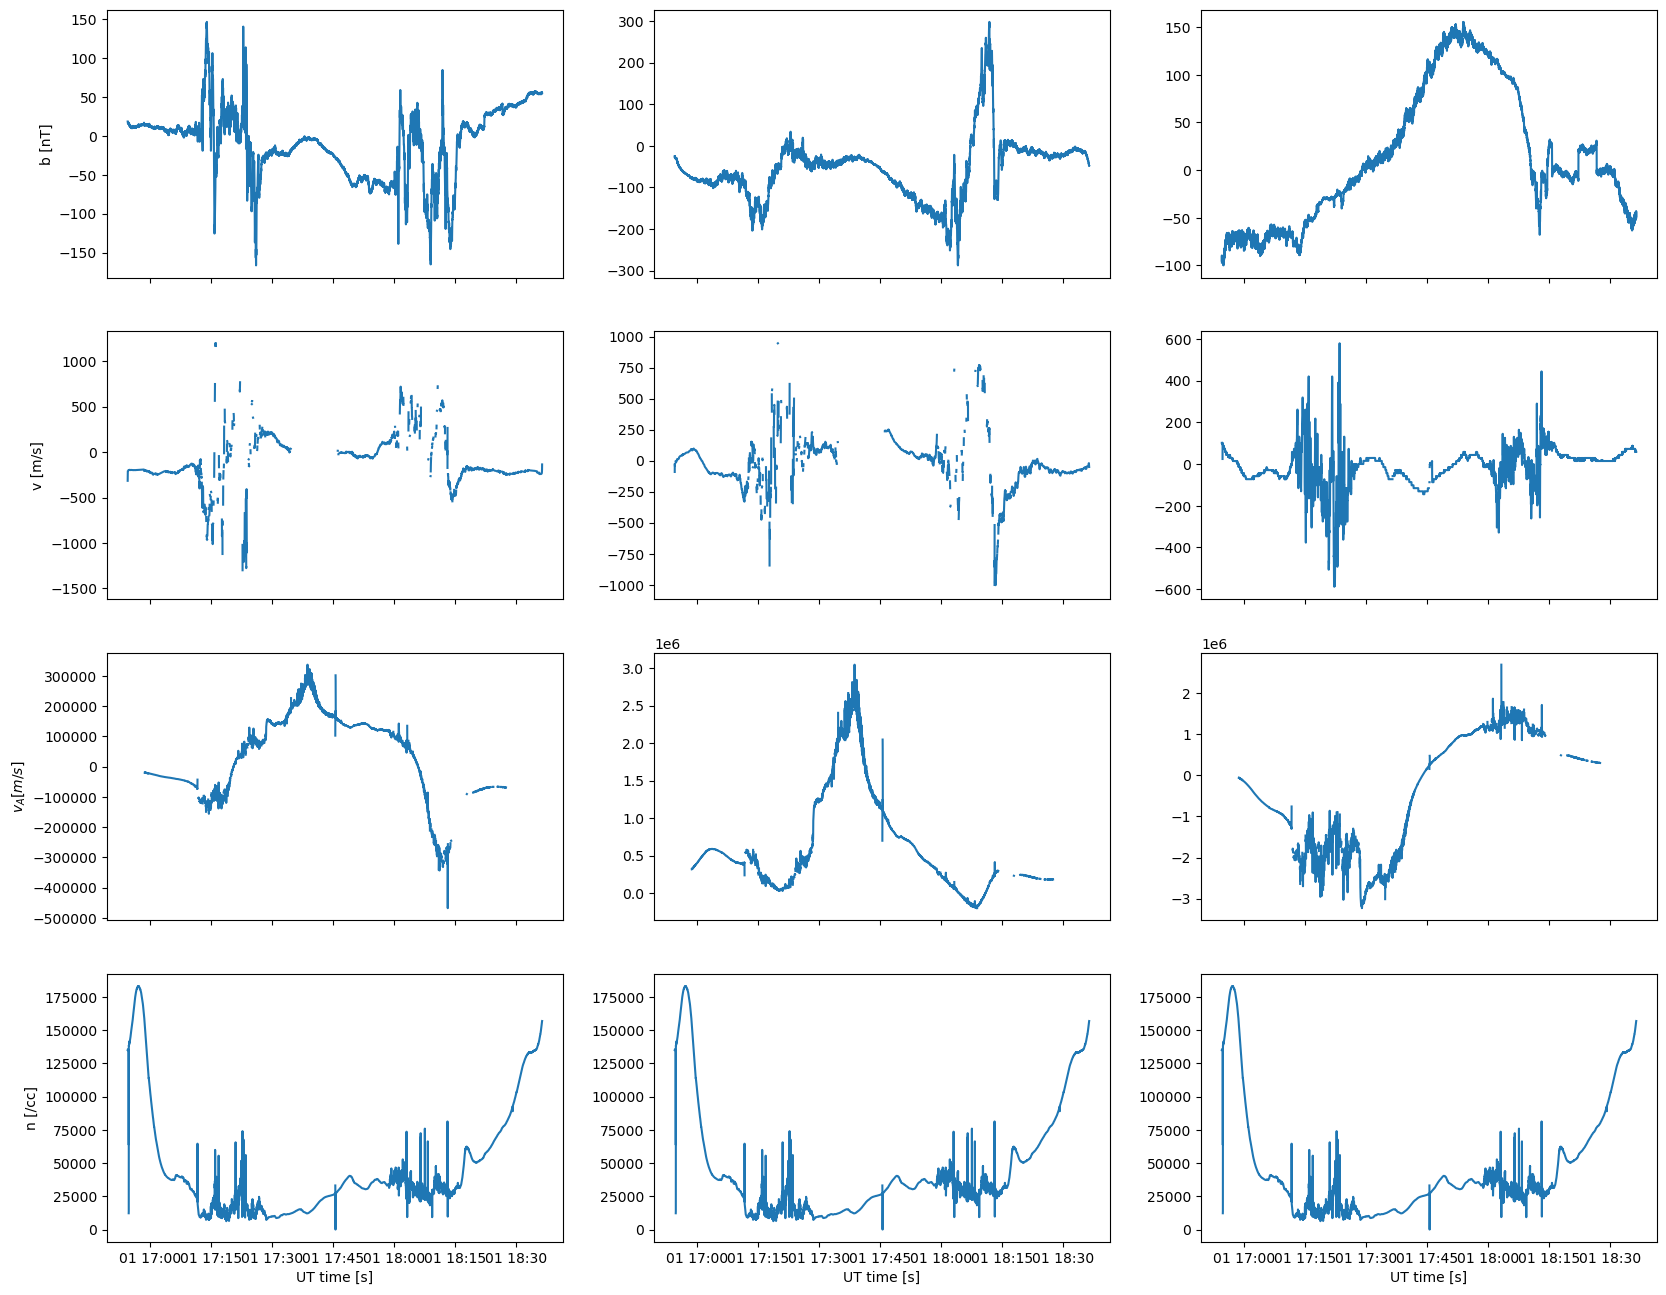

In [33]:
funcs.plot_multiple_physical_quantities(ssies3_data.index,b,v,v_A,ssies3_data['ductdens'])